### Prediction titanic surviver
- datasets: titanic.csv
- feature: corr columns
- label: survived
- learning method: supervised learning, classification, regression
- learning algorithm: decision tree, randomforest, logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = '../data/titanic.csv'

titanic_df = pd.read_csv(path)
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print('\n학습 데이터 정보 ###\n')
print(titanic_df.info())


학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


In [4]:
# 데이터의 칼럼을 맞추기 위해서
titanic_df['PassengerId'] = titanic_df.index + 1
titanic_df = titanic_df.drop(columns=['class', 'who', 'embark_town', 'alive', 'alone', 'adult_male'])
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   deck         203 non-null    object 
 9   PassengerId  891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [5]:
titanic_df = titanic_df[['PassengerId', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'deck', 'embarked']]
titanic_df.columns = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'fare','Cabin', 'Embarked']

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Sibsp,Parch,fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('N')

print("데이터 세트 Null 값 개수:", titanic_df.isna().sum(), sep='\n')

데이터 세트 Null 값 개수:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Sibsp          0
Parch          0
fare           0
Cabin          0
Embarked       0
dtype: int64


In [8]:
print('Sex 값 분포:', titanic_df['Sex'].value_counts(), sep='\n')
print()
print('Cabin 값 분포:', titanic_df['Cabin'].value_counts(), sep='\n')
print()
print('Embarked 값 분포:', titanic_df['Embarked'].value_counts(), sep='\n')

Sex 값 분포:
Sex
male      577
female    314
Name: count, dtype: int64

Cabin 값 분포:
Cabin
N    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

Embarked 값 분포:
Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [9]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [10]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

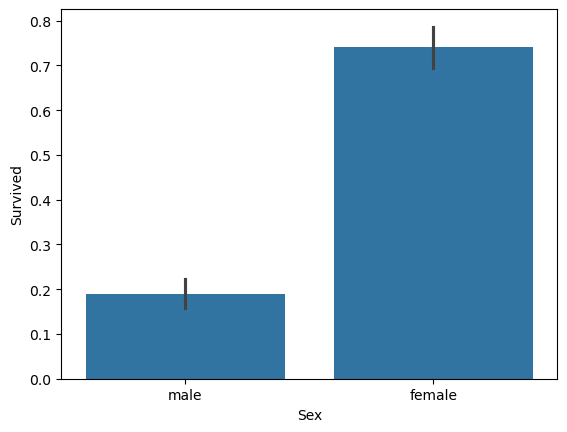

In [11]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

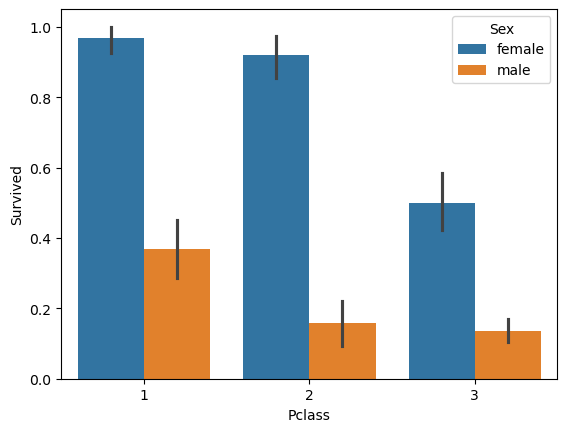

In [12]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [15]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정.
# DataFrame의 apply lambda 식에 사용.

def get_category(age):
    cat = ''
    
    if age <= 1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teanager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

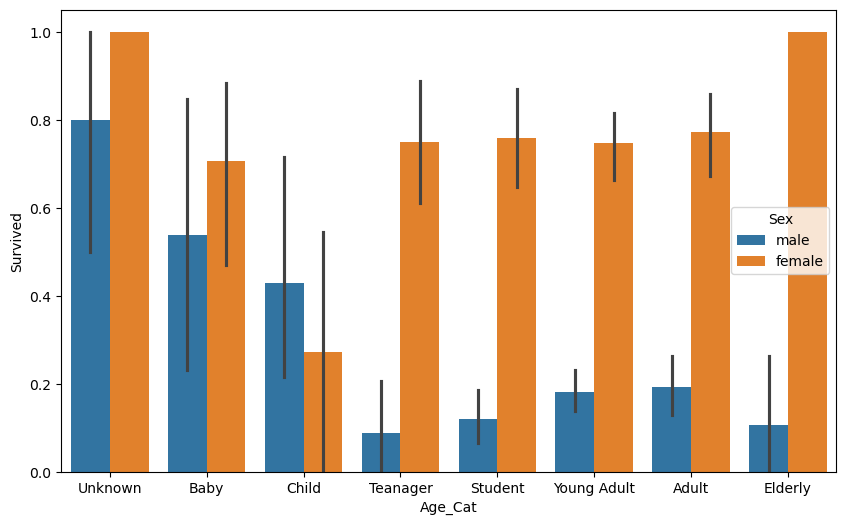

In [18]:
# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teanager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat으로 반환
titanic_df['Age_Cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_Cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df = titanic_df.drop(columns=['Age_Cat'])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
def encode_feature(data_df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(data_df[feature])
        data_df[feature] = le.transform(data_df[feature])
    
    return data_df

In [21]:
titanic_df = encode_feature(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Sibsp,Parch,fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,7,3
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,7,3
3,4,1,1,0,35.0,1,0,53.1000,2,3
4,5,0,3,1,35.0,0,0,8.0500,7,3


In [23]:
# 함수만들고 새로 하는데 저는 바로 드롭하고 하용하겠습니다

drop_survived_df = titanic_df.drop(columns=['Survived'])
drop_survived_df

,PassengerId,Pclass,Sex,Age,Sibsp,Parch,fare,Cabin,Embarked
0,1,3,1,22.000000,1,0,7.2500,7,3
1,2,1,0,38.000000,1,0,71.2833,2,0
2,3,3,0,26.000000,0,0,7.9250,7,3
3,4,1,0,35.000000,1,0,53.1000,2,3
4,5,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,7,3
887,888,1,0,19.000000,0,0,30.0000,1,3
888,889,3,0,29.699118,1,2,23.4500,7,3
889,890,1,1,26.000000,0,0,30.0000,2,0


In [24]:

from sklearn.model_selection import train_test_split

In [25]:
# 설명이 없어
label = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(drop_survived_df, label, test_size=0.2, random_state=1)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

In [28]:
# decisiontree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f"DecisionTree Accuracy: {accuracy_score(y_test, dt_pred):.4f}")

# randomforest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"RandomForest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")

# logisticregression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f"LogistictRegression Accuracy: {accuracy_score(y_test, lr_pred):.4f}")

DecisionTree Accuracy: 0.7207
RandomForest Accuracy: 0.7821
LogistictRegression Accuracy: 0.7821


c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.model_selection import KFold

In [32]:
def exec_kfold(clf, fold=5):
    kfold = KFold()
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(drop_survived_df)):
        X_train, X_test = drop_survived_df.values[train_index], drop_survived_df.values[test_index]
        y_train, y_test = label.values[train_index], label.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f'교차 검증 {iter_count} Accuracy: {accuracy:.4f}')
        
    mean_score = np.mean(scores)
    print(f"mean accuracy: {mean_score:.4f}")


In [33]:
exec_kfold(dt_clf)

교차 검증 0 Accuracy: 0.7486
교차 검증 1 Accuracy: 0.8202
교차 검증 2 Accuracy: 0.7978
교차 검증 3 Accuracy: 0.7528
교차 검증 4 Accuracy: 0.4270
mean accuracy: 0.7093


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
scores = cross_val_score(dt_clf, drop_survived_df, label)

In [36]:
for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count} Accuracy: {accuracy:.4f}')

교차 검증 0 Accuracy: 0.5419
교차 검증 1 Accuracy: 0.7865
교차 검증 2 Accuracy: 0.8034
교차 검증 3 Accuracy: 0.7697
교차 검증 4 Accuracy: 0.8034


In [37]:
mean_score = np.mean(scores)
print(f"mean accuracy: {mean_score:.4f}")

mean accuracy: 0.7410
